In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
G = nx.read_gml('karate.gml', label='id')
G1 = nx.read_gml('dolphins.gml',label='id')

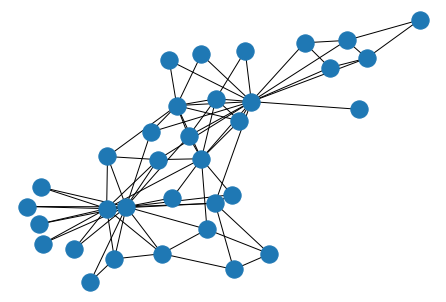

In [5]:
nx.draw(G)
plt.show()

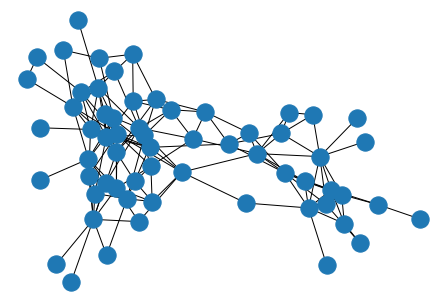

In [6]:
nx.draw(G1)
plt.show()

In [9]:
'''
color_map = []
k = max(df['ks'])
for node in G:
    if ksval[node] == k:
        color_map.append('blue')
    else: 
        color_map.append('green')      
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()
'''

"\ncolor_map = []\nk = max(df['ks'])\nfor node in G:\n    if ksval[node] == k:\n        color_map.append('blue')\n    else: \n        color_map.append('green')      \nnx.draw(G, node_color=color_map, with_labels=True)\nplt.show()\n"

In [17]:
import random
def func(G,seed,te,ti,tr,p):
    k = []
    affected = seed
    exposed = []
    infected = []
    recovered = []
    for _ in range(te):
        exposed.append(k)
    for _ in range(ti):
        infected.append(k)
    for _ in range(tr):
        recovered.append(k)
    exposed[0] = seed
    exp = [item for sublist in exposed for item in sublist]
    inf = []
    rec = []
    #print(exp)
    #print(exposed, infected, recovered)
    iter = 0
    while(1):
        print('Exposed',[item for sublist in exposed for item in sublist])
        print()
        
        iter += 1
        if (len(exp) == 0 and len(inf) == 0) or len(rec) == len(G.nodes()):
            # returning nodes that are exposed
            # nodes that are recovered
            # all nodes that were affected
            return exposed, infected, recovered, affected
        tmp = []
        for i in range(tr-1,0,-1):
            recovered[i] = recovered[i-1]
        recovered[0] = infected[ti-1]
        for i in range(ti-1,0,-1):
            infected[i] = infected[i-1]
        infected[0] = exposed[te-1]
        for i in range(te-1,0,-1):
            exposed[i] = exposed[i-1]
        exposed[0] = []
        #print(exposed, infected, recovered)
        exp = [item for sublist in exposed for item in sublist]
        inf = [item for sublist in infected for item in sublist]
        rec = [item for sublist in recovered for item in sublist]
        
        print('Day',iter)
        print('Infected',inf)
        print('Recovered',rec)
        for node in inf:
            for each in G.neighbors(node):
                r = random.uniform(0,1)
                if r < p and each not in exp and each not in inf and each not in rec and each not in tmp:
                    tmp.append(each)
                    if each not in affected:
                        #print()
                        affected.append(each)
        exposed[0] = tmp
        print('New infected',tmp)

In [7]:
e, i, r, a = func(G,[1,2,11],1,2,5,0.4)

Exposed [1, 2, 11]

Day 1
Infected [1, 2, 11]
Recovered []
New infected [4, 5, 6, 7, 12, 13, 14, 18, 31]
Exposed [4, 5, 6, 7, 12, 13, 14, 18, 31]

Day 2
Infected [4, 5, 6, 7, 12, 13, 14, 18, 31, 1, 2, 11, 4, 5, 6, 7, 12, 13, 14, 18, 31]
Recovered []
New infected [8, 17, 34, 33, 9, 20, 22, 3]
Exposed [8, 17, 34, 33, 9, 20, 22, 3]

Day 3
Infected [8, 17, 34, 33, 9, 20, 22, 3, 4, 5, 6, 7, 12, 13, 14, 18, 31]
Recovered [1, 2, 11, 4, 5, 6, 7, 12, 13, 14, 18, 31, 8, 17, 34, 33, 9, 20, 22, 3]
New infected [10, 15, 21, 24, 28, 32, 19, 23]
Exposed [10, 15, 21, 24, 28, 32, 19, 23]

Day 4
Infected [10, 15, 21, 24, 28, 32, 19, 23, 8, 17, 34, 33, 9, 20, 22, 3]
Recovered [4, 5, 6, 7, 12, 13, 14, 18, 31, 1, 2, 11, 4, 5, 6, 7, 12, 13, 14, 18, 31, 8, 17, 34, 33, 9, 20, 22, 3, 10, 15, 21, 24, 28, 32, 19, 23]
New infected [30, 29, 16]
Exposed [30, 29, 16]

Day 5
Infected [30, 29, 16, 10, 15, 21, 24, 28, 32, 19, 23]
Recovered [8, 17, 34, 33, 9, 20, 22, 3, 4, 5, 6, 7, 12, 13, 14, 18, 31, 1, 2, 11, 4, 5, 6,

In [9]:
len(G.nodes())

34

In [20]:
e, i, r, a = func(G1,[2,10],2,1,5,0.2)

Exposed [2, 10]

Day 1
Infected []
Recovered []
New infected []
Exposed [2, 10]

Day 2
Infected [2, 10]
Recovered []
New infected [47]
Exposed [47]

Day 3
Infected []
Recovered [2, 10, 47]
New infected []
Exposed [47]

Day 4
Infected [47]
Recovered [2, 10, 47]
New infected []
Exposed []

Day 5
Infected []
Recovered [47, 2, 10, 47]
New infected []
Exposed []



In [21]:
len(a)

3

In [40]:
bins

[[12],
 [10, 13, 15, 16, 17, 18, 19, 21, 22, 23, 27],
 [5, 6, 7, 11, 20, 24, 25, 26, 28, 29, 30, 32],
 [1, 2, 3, 4, 8, 9, 14, 31, 33, 34]]

In [48]:
# defining the same function as func() but without print statements
def func1(G,seed,te,ti,tr,p):
    k = []
    affected = seed
    exposed = []
    infected = []
    recovered = []
    for _ in range(te):
        exposed.append(k)
    for _ in range(ti):
        infected.append(k)
    for _ in range(tr):
        recovered.append(k)
    exposed[0] = seed
    exp = [item for sublist in exposed for item in sublist]
    inf = []
    rec = []
    #print(exp)
    #print(exposed, infected, recovered)
    while(1):
        if (len(exp) == 0 and len(inf) == 0) or len(rec) == len(G.nodes()):
            # returning nodes that are exposed
            # nodes that are recovered
            # all nodes that were affected
            return exposed, infected, recovered, affected
        tmp = []
        for i in range(tr-1,0,-1):
            recovered[i] = recovered[i-1]
        recovered[0] = infected[ti-1]
        for i in range(ti-1,0,-1):
            infected[i] = infected[i-1]
        infected[0] = exposed[te-1]
        for i in range(te-1,0,-1):
            exposed[i] = exposed[i-1]
        exposed[0] = []
        #print(exposed, infected, recovered)
        exp = [item for sublist in exposed for item in sublist]
        inf = [item for sublist in infected for item in sublist]
        rec = [item for sublist in recovered for item in sublist]
        
        for node in inf:
            for each in G.neighbors(node):
                r = random.uniform(0,1)
                if r < p and each not in exp and each not in inf and each not in rec and each not in tmp:
                    tmp.append(each)
                    if each not in affected:
                        #print()
                        affected.append(each)
        exposed[0] = tmp

In [84]:
import pandas as pd

In [169]:
ksval = nx.core_number(G1)

m=max(ksval.values())
n=min(ksval.values())
bins = []
for i in range(n,m+1):
    bins.append([])

for node,val in ksval.items():
    bins[val-1].append(node)

kdf = pd.DataFrame()
for j in range(20):
    list1 = []
    for i in range(n-1,m):
        seed = []
        seed.append(random.choice(bins[i]))
        seed.append(random.choice(bins[i]))
        seed.append(random.choice(bins[i]))
        t_e = 1
        t_i = 1
        t_r = 5
        p = 0.5
        e, i, r, a = func1(G1,seed,t_e,t_i,t_r,p)
        list1.append(len(a))
    kdf['run'+str(j)] = list1
kdf.index += 1
kdf = kdf.transpose()

In [170]:
val = kdf.mean(axis = 0)

In [171]:
kdf

,1,2,3,4
run0,56,59,55,55
run1,57,55,53,56
run2,52,59,51,62
run3,53,52,52,53
run4,56,52,58,57
run5,57,55,62,51
run6,50,51,58,37
run7,58,54,52,53
run8,3,51,43,52
run9,3,52,58,58


In [172]:
val

1    42.45
2    54.65
3    52.20
4    52.85
dtype: float64

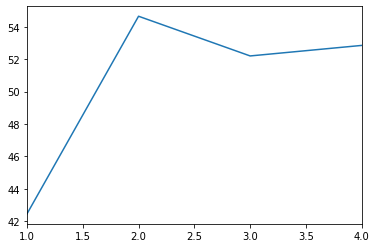

In [173]:
val.plot() 
plt.show() 